In [54]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
from matplotlib import animation


In [55]:
def print_quantum_state_as_superposition(state):
    """
    Helper function to print quantum state as superposition of basis functions.
    """
    state = state.unit()
    dimension = int(np.log2(state.shape[0]))
    state_vector = state.full().flatten()
    basis_states = ['0', '1']
    
    superposition = []
    for i, amplitude in enumerate(state_vector):
        abs_amplitude = np.abs(amplitude)

        if round(abs_amplitude, 2) > 0:
            real_part = amplitude.real
            imag_part = amplitude.imag

            amplitude_str = ""
            if np.isclose(real_part, 0, atol=1e-2) and np.isclose(imag_part, 0, atol=1e-2):
                continue 

            if not np.isclose(real_part, 0, atol=1e-2):
                amplitude_str += f"{real_part:.2f}"
            
            if not np.isclose(imag_part, 0, atol=1e-2):
                if imag_part > 0 and amplitude_str:
                    amplitude_str += f" + {imag_part:.2f}i"
                else:
                    amplitude_str += f" {imag_part:.2f}i"

            binary_state = ''.join(basis_states[int(bit)] for bit in f"{i:0{dimension}b}")
            superposition.append(f"{amplitude_str}|{binary_state}⟩")

    superposition = [i.replace(' ','') for i in superposition]
    superposition_str = ' + '.join(superposition).replace('+-', '-').replace('+ -', '- ')
    
    print(f"|ψ⟩ = {superposition_str}")


def is_stabilized(state, stabilizers):
    """
    Check if a state is stabilized
    """
    stabilized = True
    syndrome = []
    overlaps = []
    for stabilizer in stabilizers:
        overlap = state.overlap(stabilizer * state)
        overlaps.append(np.abs(overlap))
        if not np.real(overlap) > 0.99:
            stabilized = False
            syndrome.append(1)
        else:
            syndrome.append(0)
            
    return syndrome, stabilized, overlaps


Text(0.5, 1.0, 'Pulses over time')

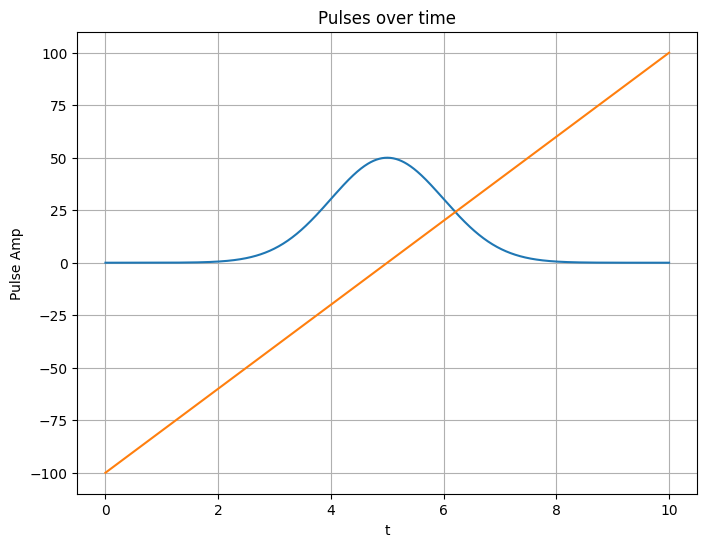

In [104]:
# defining time dependant coefs
T = 10
t = np.linspace(0, T, 1000)
sigma = 1
omega_t = 50 * np.exp(-0.5 * ((t - T/2) / sigma) ** 2)

delta_t = 100*(t / (T/2) - 1)

# Plot the wave
plt.figure(figsize=(8, 6))
plt.plot(t, omega_t)
plt.plot(t, delta_t)
plt.xlabel("t")
plt.ylabel("Pulse Amp")
plt.grid(True)
plt.title("Pulses over time")


In [39]:
I = qeye(2)
X = sigmax()
Y = sigmay()
Z = sigmaz()

basis_states = [basis(2, 0), basis(2, 1)]

zero_state = basis_states[0]

one_state = X * zero_state

print_quantum_state_as_superposition(zero_state)
print_quantum_state_as_superposition(one_state)

|ψ⟩ = 1.00|0⟩
|ψ⟩ = 1.00|1⟩


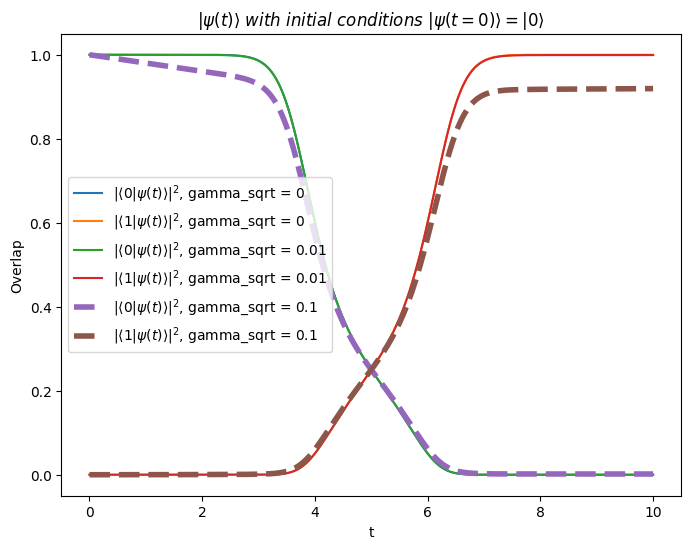

In [105]:
gamma_sqrts = [0, 0.01, 0.1]
plt.figure(figsize=(8, 6))


for i, gamma_sqrt in enumerate(gamma_sqrts):
    C_op = gamma_sqrt * sigmam()
    collapse_ops = [
        C_op
    ]

    # Define time-dependent Hamiltonian
    H_S = [[X, omega_t], [Z, delta_t]]
    
    output = mesolve(H_S, zero_state, t, c_ops=collapse_ops, e_ops=[])

    expect_psi_0 = []
    expect_psi_1 = []


    for index, state in enumerate(output.states):
        expect_stat_psi_0 = np.abs(zero_state.overlap(state))**2
        expect_stat_psi_1 = np.abs(one_state.overlap(state))**2
        
        expect_psi_0.append(expect_stat_psi_0)
        expect_psi_1.append(expect_stat_psi_1)

    eigenvalues_0 = np.array(expect_psi_0)
    eigenvalues_1 = np.array(expect_psi_1)

    # Plotting the results
    if i == (len(gamma_sqrts) - 1):
        plt.plot(t, eigenvalues_0, '--', label=r'$|\langle 0 | \psi(t) \rangle|^2$, gamma_sqrt = {}'.format(gamma_sqrt), linewidth=4)
        plt.plot(t, eigenvalues_1, '--', label=r'$|\langle 1 | \psi(t) \rangle|^2$, gamma_sqrt = {}'.format(gamma_sqrt), linewidth=4)
    else:
        plt.plot(t, eigenvalues_0, label=r'$|\langle 0 | \psi(t) \rangle|^2$, gamma_sqrt = {}'.format(gamma_sqrt))
        plt.plot(t, eigenvalues_1, label=r'$|\langle 1 | \psi(t) \rangle|^2$, gamma_sqrt = {}'.format(gamma_sqrt))
    
    
plt.legend()
plt.title(r'$| \psi(t) \rangle \ with \ initial \ conditions \ | \psi(t=0) \rangle = |0\rangle$')
plt.xlabel("t")
plt.ylabel("Overlap")
plt.show()

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[1. 0.]
 [0. 0.]]
Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 9.99998999e-01+0.00000000e+00j -1.33856803e-06+8.82050764e-07j]
 [-1.33856803e-06-8.82050764e-07j  1.00100307e-06+0.00000000e+00j]]
Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 9.99997998e-01+0.00000000e+00j -1.68549547e-06-6.56778675e-07j]
 [-1.68549547e-06+6.56778675e-07j  2.00200324e-06+0.00000000e+00j]]
Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 9.99996997e-01+0.00000000e+00j -1.85528774e-07-3.04648491e-07j]
 [-1.85528774e-07+3.04648491e-07j  3.00299856e-06+0.00000000e+00j]]
Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 9.99995996e-01+0.00000000e+00j -1.19599343e-06+1.00700469e-06j]
 [-1.19599343e-06-1.0070

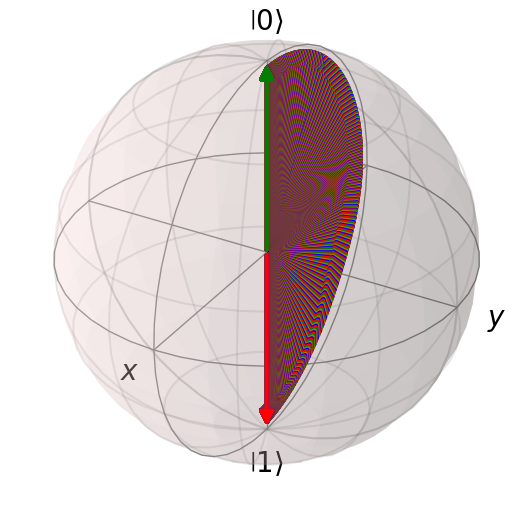

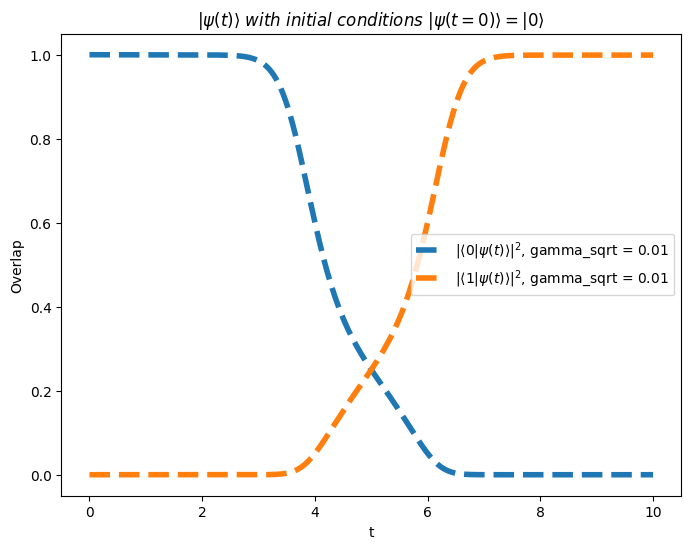

In [106]:
# gamma values for the collapse operators
gamma_sqrts = [0.01]

# Bloch sphere and set up figure for plotting
bloch = Bloch()


# Create figure for plotting time evolution overlaps
plt.figure(figsize=(8, 6))

for i, gamma_sqrt in enumerate(gamma_sqrts):
    C_op = gamma_sqrt * sigmam()
    collapse_ops = [C_op]

    # Define time-dependent Hamiltonian
    H_S = [[sigmax(), omega_t], [sigmaz(), delta_t]]
    
    # Solve the system using mesolve
    output = mesolve(H_S, zero_state, t, collapse_ops, [])

    # Lists for storing expectation values of overlaps
    expect_psi_0 = []
    expect_psi_1 = []

    for index, state in enumerate(output.states):
        # Compute overlaps with |0> and |1> states
        expect_stat_psi_0 = np.abs(zero_state.overlap(state))**2
        expect_stat_psi_1 = np.abs(one_state.overlap(state))**2
        
        expect_psi_0.append(expect_stat_psi_0)
        expect_psi_1.append(expect_stat_psi_1)
        
        # Add the state to the Bloch sphere
        print(state)
        bloch.add_states(state)

    eigenvalues_0 = np.array(expect_psi_0)
    eigenvalues_1 = np.array(expect_psi_1)

    # Plotting the overlaps as a function of time
    if i == (len(gamma_sqrts) - 1):
        plt.plot(t, eigenvalues_0, '--', label=r'$|\langle 0 | \psi(t) \rangle|^2$, gamma_sqrt = {}'.format(gamma_sqrt), linewidth=4)
        plt.plot(t, eigenvalues_1, '--', label=r'$|\langle 1 | \psi(t) \rangle|^2$, gamma_sqrt = {}'.format(gamma_sqrt), linewidth=4)
    else:
        plt.plot(t, eigenvalues_0, label=r'$|\langle 0 | \psi(t) \rangle|^2$, gamma_sqrt = {}'.format(gamma_sqrt))
        plt.plot(t, eigenvalues_1, label=r'$|\langle 1 | \psi(t) \rangle|^2$, gamma_sqrt = {}'.format(gamma_sqrt))

# Final rendering of the Bloch sphere (shows the last state)
bloch.show()

# Plotting the overlaps with the |0> and |1> states over time
plt.legend()
plt.title(r'$| \psi(t) \rangle \ with \ initial \ conditions \ | \psi(t=0) \rangle = |0\rangle$')
plt.xlabel("t")
plt.ylabel("Overlap")
plt.show()
